# 02 Linear Q agent

#### 👉 Let's use a linear model to approximat the q-value function.

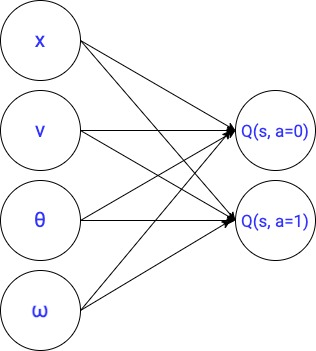

In [59]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [60]:
import gym
env = gym.make('CartPole-v1')

## Hyperparameters

In [50]:
# Good hyper-parameters
# make you feel great!
hparams = {
    'learning_rate': 0.0005652080372498697,
    'discount_factor': 0.99,
    'batch_size': 64,
    'memory_size': 100000,
    'freq_steps_train': 128,
    'freq_steps_update_target': 100,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 4,
    'max_grad_norm': 10,
    'normalize_state': False,
    'epsilon_start': 0.9,
    'epsilon_end': 0.0429612235926375,
    'steps_epsilon_decay': 1000
}

SEED = 2636569667

## ⚠️ Fix random seeds

In [51]:
from src.utils import set_seed
set_seed(env, SEED)

## QAgent

In [52]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

10 parameters


## Train the agent 🏋️

In [53]:
from src.loops import train
train(agent, env, n_episodes=2000)

 10%|███████▌                                                                  | 203/2000 [00:09<06:59,  4.28it/s]

Reward mean: 215.39, std: 31.98
Num steps mean: 215.39, std: 31.98


 20%|██████████████▊                                                           | 401/2000 [00:25<18:06,  1.47it/s]

Reward mean: 325.01, std: 74.61
Num steps mean: 325.01, std: 74.61


 30%|██████████████████████▏                                                   | 601/2000 [00:58<22:52,  1.02it/s]

Reward mean: 388.43, std: 78.37
Num steps mean: 388.43, std: 78.37


 40%|█████████████████████████████▋                                            | 804/2000 [01:13<03:57,  5.05it/s]

Reward mean: 246.66, std: 88.14
Num steps mean: 246.66, std: 88.14


 50%|████████████████████████████████████▌                                    | 1002/2000 [01:24<03:38,  4.57it/s]

Reward mean: 233.55, std: 76.41
Num steps mean: 233.55, std: 76.41


 60%|███████████████████████████████████████████▊                             | 1200/2000 [01:39<07:46,  1.71it/s]

Reward mean: 214.21, std: 58.58
Num steps mean: 214.21, std: 58.58


 70%|███████████████████████████████████████████████████                      | 1400/2000 [01:58<03:58,  2.51it/s]

Reward mean: 193.29, std: 43.07
Num steps mean: 193.29, std: 43.07


 80%|██████████████████████████████████████████████████████████▍              | 1601/2000 [02:21<05:53,  1.13it/s]

Reward mean: 185.18, std: 40.49
Num steps mean: 185.18, std: 40.49


 90%|█████████████████████████████████████████████████████████████████▊       | 1802/2000 [02:37<01:06,  2.99it/s]

Reward mean: 175.02, std: 44.96
Num steps mean: 175.02, std: 44.96


100%|█████████████████████████████████████████████████████████████████████████| 2000/2000 [02:51<00:00, 11.67it/s]

Reward mean: 159.43, std: 39.42
Num steps mean: 159.43, std: 39.42


## Evaluate the agent ⏱️

In [58]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.01
)

100%|█████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.04it/s]


In [55]:
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 163.55, std 40.32


## Let's see how far we got in each attempt

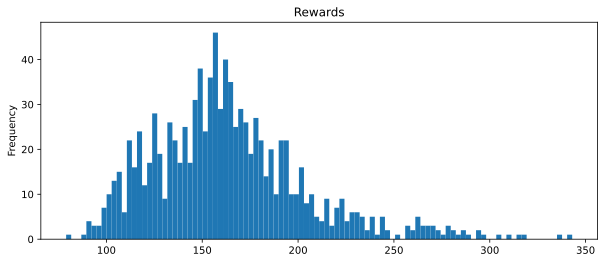

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")    
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

In [73]:
from src.viz import show_video

show_video(agent, env, sleep_sec=0.1)